In [1]:
import pandas as pd
%matplotlib inline

In [2]:
movies = pd.read_csv('movies.csv')
# movies.head()

In [3]:
ratings = pd.read_csv('ratings.csv')
# ratings.head()

# Question 1

How many unique movies and users are in the dataset?

In [4]:
movies.movieID.nunique(), ratings.userID.nunique()

(9125, 671)

> **NOTE:** _ratings.movieID.nunique()_ is **not** the right answer.

# Question 2

Who is the user who saw the highest number of movies? How many movies did he see? 

What is the average number of ratings (movies) per user?

In [5]:
grp_users = ratings.groupby('userID')['movieID']

In [6]:
movie_count = grp_users.count()
max_user = movie_count.argmax()
movie_count[[max_user]]

userID
547    2391
Name: movieID, dtype: int64

In [7]:
grp_users.count().mean()

149.03725782414307

# Question 3

How many movies have an average rating higher than 4.8? What do they have in common?

In [8]:
movie_average_rating = ratings.groupby('movieID')['rating'].mean()
high_rated_movies = movie_average_rating[movie_average_rating > 4.8]
len(high_rated_movies)

316

High-rated movies are charaterized by a very small number of reviewers. This is illustrated by the next code snippet.

In [9]:
high_rated_ratings = ratings[ratings.movieID.isin(high_rated_movies.index)]
high_rated_movies_users = high_rated_ratings.groupby('movieID')['userID'].count()
high_rated_movies_users.mean()

1.0569620253164558

# Question 4

How many movies are classified as ‘Comedy’?

In [10]:
movies.genres.str.contains('Comedy').sum()

3315

# Question 5

How many movies are rated with each rating? Draw a barplot of the result?

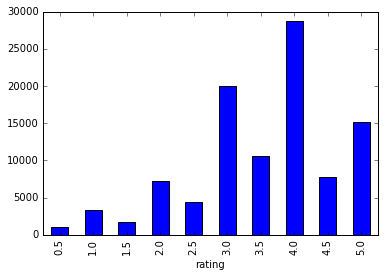

In [11]:
ratings.groupby('rating')['movieID'].count().plot.bar()

# Question 6

What is the most common movie genre?

## Solution I

In [12]:
movies.genres.str.get_dummies('|').sum().argmax()

'Drama'

## Solution II

In [13]:
movies.genres.str.split('|', expand=True).stack().value_counts().argmax()

'Drama'

# Question 7

What is the average rating per user? Draw a histogram of this data.

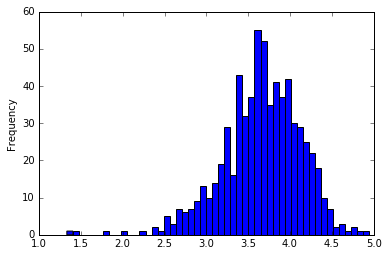

In [14]:
ratings.groupby('userID')['rating'].mean().plot.hist(bins=50)

# Question 8

Draw a histogram of the number of movies per user. 

Repeat this, but filter out users who saw more than 500 movies.

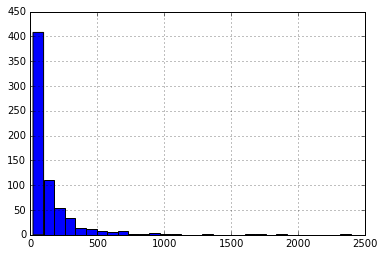

In [15]:
ratings.groupby('userID')['movieID'].count().hist(bins=30)

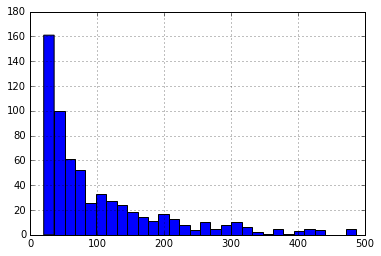

In [16]:
filtered_ratings = ratings.groupby('userID').filter(lambda grp: len(grp) < 500)
filtered_ratings.groupby('userID')['movieID'].count().hist(bins=30)

# Question 9

**Part I:** Which movies (names) have the highest average rating? Have you heard about them? Why?

**Part II:** Repeat the previous question, but filter out movies with less than 30 watchers.

## Part I

In [17]:
high_rated_movies_wo_name = ratings.groupby('movieID')['rating'].mean()
high_rated_movies_w_name = movies.join(high_rated_movies_wo_name, on='movieID')
high_rated_movies_w_name.sort_values('rating', ascending=False).title.head()

9122    The Beatles: Eight Days a Week - The Touring Y...
7321                                 Padre padrone (1977)
6651                                 Amazing Grace (2006)
6684         Woman on the Beach (Haebyeonui yeoin) (2006)
6726                                  O Lucky Man! (1973)
Name: title, dtype: object

> **NOTE:** A short explanation of the difference between _join()_ and _merge()_ can be found [here][1].

[1]: https://stackoverflow.com/questions/22676081/pandas-the-difference-between-join-and-merge "join-vs-merge"

## Part II

In [18]:
hot_ratings = ratings.groupby('movieID').filter(lambda grp: len(grp) > 30)
high_rated_movies_wo_name = hot_ratings.groupby('movieID')['rating'].mean()
high_rated_movies_w_name = movies.join(high_rated_movies_wo_name, on='movieID')
high_rated_movies_w_name.sort_values('rating', ascending=False).title.head()

695                Godfather, The (1972)
284     Shawshank Redemption, The (1994)
746                 All About Eve (1950)
786            African Queen, The (1951)
1624                   Roger & Me (1989)
Name: title, dtype: object